In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [2]:
#Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#Normalize the images to the range 1 - 0
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
#Convert class vectors to binary class matrices (one-hot  encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
#Define AlexNet Model in Kera
input_shape = (32, 32, 3)
num_classes = 10
alexnet_model = models.Sequential()

#Layer 1: Conv Layer
alexnet_model.add(Conv2D(96, (11, 11), strides = 4, padding = 'same', input_shape = input_shape))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1)))

#Layer 2: Conv Layer
alexnet_model.add(Conv2D(256, (5, 5), padding = 'same'))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1)))

#Layer 3: Conv Layer
alexnet_model.add(Conv2D(384, (3, 3), padding = 'same'))
alexnet_model.add(layers.Activation('relu'))

#Layer 4: Conv Layer
alexnet_model.add(Conv2D(384, (3, 3), padding = 'same'))
alexnet_model.add(layers.Activation('relu'))

#Layer 5: Conv Layer
alexnet_model.add(Conv2D(256, (3, 3), padding = 'same'))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1)))

#Flatten the data for fully connected layer
alexnet_model.add(Flatten())

#Layer 6: Fully Connected Layer
alexnet_model.add(Dense(4096))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(layers.Dropout(0.5))

#Layer 7: Output Layer
alexnet_model.add(Dense(num_classes))
alexnet_model.add(layers.Activation('softmax'))


C:\Users\KH.EN.P2MCA24160\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
alexnet_model.compile(optimizer = Adam,
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])

In [10]:
alexnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 6, 6, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,008,074 (114.47 MB)

 Trainable params: 30,007,370 (114.47 MB)

 Non-trainable params: 704 (2.75 KB)

In [17]:
#--model architecture---
tf.keras.utils.plot_model(alexnet_model, show_layer_names=True, show_shapes=True, show_dtype=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [18]:
#Create data augmentation generator
datagen = ImageDataGenerator(
    width_shift_range = 0.1, # randomly shift images horizontally
    height_shift_range = 0.1, # randomly shift images vertically
    horizontal_flip = True    #randomly flip images horizontally
)

In [19]:
datagen.fit(x_train)

In [21]:
#Train the model
history = alexnet_model.fit(datagen.flow(x_train, y_train, batch_size = 512),
                            epochs = 2,
                            validation_data = (x_test, y_test),
                            verbose = 1)

Epoch 1/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.0972 - loss: 2320.5627 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 2/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.0992 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3037


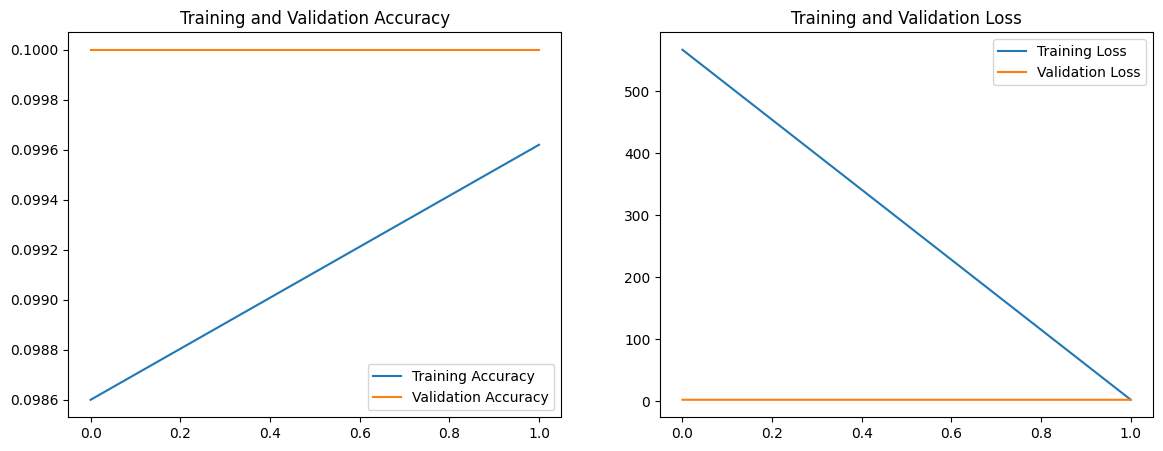

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()